# Prädiktion ARIMA-Modell
Import der verwendeten Pakete

In [1]:
import pmdarima as pma
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from service.DataService import DataService
from joblib import load

## Initialisieren der DataService-Klasse

In [2]:
ds = DataService()

## Laden des Trainings- und Testdatensatzes

In [11]:
df_train = load('../../data/trainingsdata/df_train')
df_325723_test = load('../../data/testdata/df_325723_test')

## Visualisierung des Trainingsdatensatzes

<Axes: xlabel='date'>

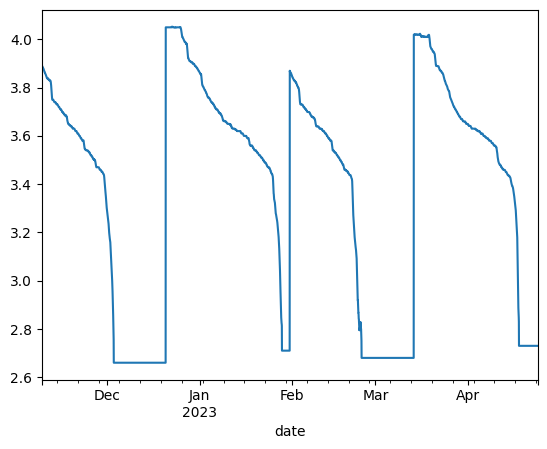

In [10]:
df_train['rm_data_BatV'].plot()

## Prüfung auf Stationarität (Augmented Dickey-Fuller Test)
Liegt der p-Wert unter einer gewissen Schwelle (meist werden dafür 5 %, d. h. p < 0.05, veranschlagt), kann mit hinreichender Sicherheit (bei p < 0.05 zu 95 %) davon ausgegangen werden, dass die Zeitreihe stationär ist. Liegt er darüber, muss die Alternativhypothese (die Zeitreihe ist stationär) verworfen und die Nullhypothese (die Zeitreihe ist nicht stationär) angenommen werden.

In [4]:
ds.ad_test(df_train['rm_data_BatV'])

1. ADF : -2.3325211837089466
2. P-Value : 0.16169362186896102
3. Num Of Lags : 0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 3999
5. Critical Values : 
	1% : -3.431986284700283
	5% : -2.862263021072379
	10% : -2.5671548718243575


## Auto-ARIMA-Verfahren
Algorithmus zur Bestimmung der optimalen Parameter für ein ARIMA-Modell

In [16]:
pmas = pma.auto_arima(df_train['data_BatV'])
pmas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4000
Model:               SARIMAX(1, 1, 0)   Log Likelihood                7459.605
Date:                Tue, 20 Jun 2023   AIC                         -14915.210
Time:                        14:26:59   BIC                         -14902.623
Sample:                    11-08-2022   HQIC                        -14910.748
                         - 04-24-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0385      0.012     -3.338      0.001      -0.061      -0.016
sigma2         0.0014   1.33e-06   1054.586      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         206563965.34
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            31.53
Prob(H) (two-sided):                  0.38   Kurtosis:                      1114.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Erstellen und Trainieren des ARIMA-Modells

In [12]:
sarimax = SARIMAX(df_train['rm_data_BatV'], order=(1, 1, 0)) # Create the model
result = sarimax.fit() # Train the model
result.summary() # Summary of the trained model

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.90770D+00    |proj g|=  1.45789D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      7      1     0     0   7.918D-03  -1.908D+00
  F =  -1.9076999498601459     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           rm_data_BatV   No. Observations:                 4000
Model:               SARIMAX(1, 1, 0)   Log Likelihood                7630.800
Date:                Tue, 20 Jun 2023   AIC                         -15257.600
Time:                        20:32:39   BIC                         -15245.012
Sample:                    11-08-2022   HQIC                        -15253.138
                         - 04-24-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0076      0.049      0.153      0.878      -0.089       0.104
sigma2         0.0013   1.12e-06   1148.558      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):         290692271.91
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            35.97
Prob(H) (two-sided):                  0.20   Kurtosis:                      1321.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Prädiktion über die Trainingsdaten und Visualisierung der Ergebnisse

<Axes: xlabel='date'>

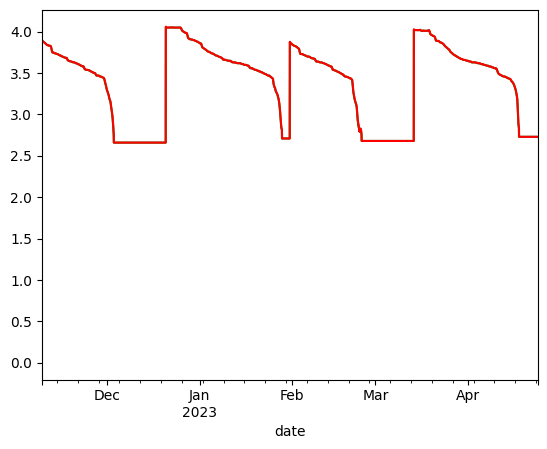

In [7]:
predict_train = result.predict(start=df_train.index[0]) # Generate prediction for the training data
df_train['rm_data_BatV'].plot(color='green')
predict_train.plot(color='red')

## Prädiktion über vier Wochen und Visualisierung der Ergebnisse

/Users/maximilianrupprecht/miniforge3/envs/thesis_maximilian_rupprecht/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/maximilianrupprecht/miniforge3/envs/thesis_maximilian_rupprecht/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


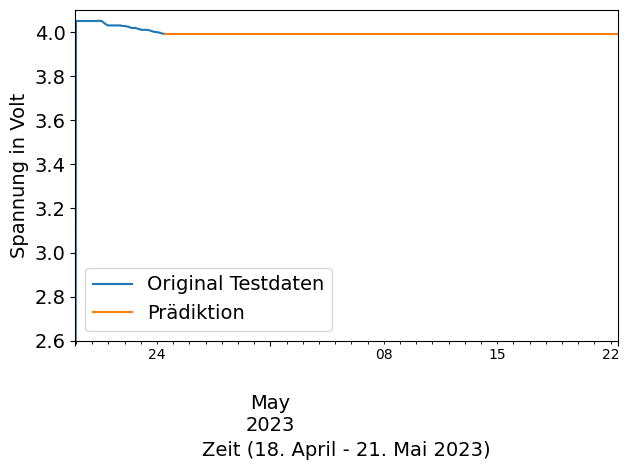

In [8]:
model = SARIMAX(df_325723_test[5:]['rm_data_BatV'],  order=(1, 1, 0)) # Create a new model for prediction over the test data set.
result_new = model.filter(result.params) # Applying the trained parameters to the model
predict_test = result_new.predict(start=df_325723_test.index[5]) # Prädiktionen für die Testdaten
predict_test_future = result_new.forecast(steps=24 * 7 * 4) # Predictions four weeks into the future

fontsize = 14
y_lim = (2.6, 4.1)
predict_test.plot(label='Original Testdaten')
predict_test_future.plot(label='Prädiktion')
plt.xlabel('Zeit (18. April - 21. Mai 2023)', fontsize=fontsize)
plt.ylabel('Spannung in Volt', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.ylim(y_lim)
plt.tight_layout()
plt.savefig(f'../../data/png/ARIMA_forecast', pad_inches=2)